<a href="https://colab.research.google.com/github/AlishaMadaan/LGMVIP-DataScience/blob/main/Task3/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-3: Prediction using Decision Tree Algorithm**

Import Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree

Load Dataset

In [56]:
# Reading Iris dataset from csv file
dataset = pd.read_csv('Iris.csv')

Summarize the dataset

In [57]:
# Checking the shape of the dataset
print(dataset.shape)

(150, 6)


In [58]:
# Printing first 5 rows
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
# Printing last 5 rows
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
# Basic information regarding data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(

In [15]:
# Describe function gives the basic numerical info about data for each numeric feature.
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
# Checking datatypes for all features
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [19]:
# Data points count value for each species
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
# Droping Id column(have no use)
dataset.drop(['Id'], axis=1,inplace=True)

Data visualization

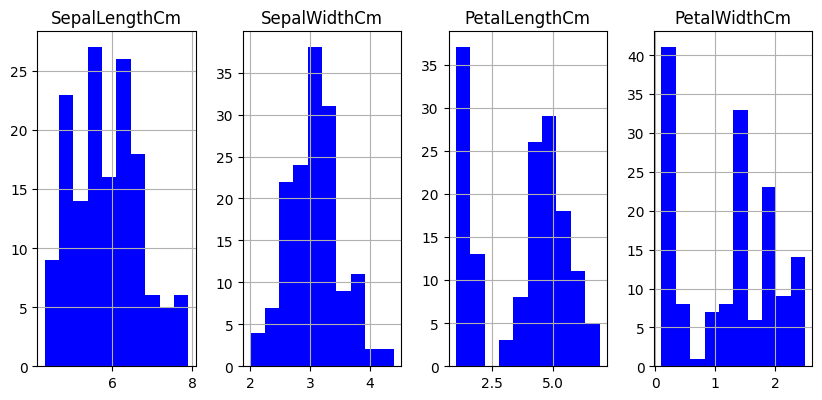

In [24]:
# histogram
dataset.hist(figsize=(10,10), layout=(2,4), color="blue");

<ipython-input-25-56668fd70c4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True);


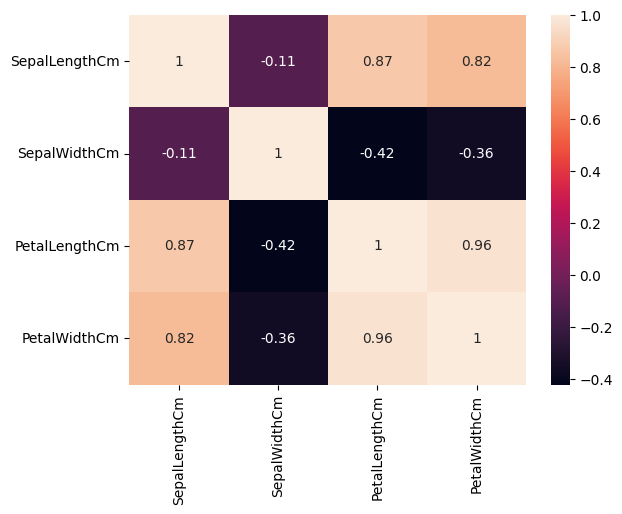

In [25]:
# Correlation Matrix
sns.heatmap(dataset.corr(), annot=True);

Preprocessing the data

In [21]:
X = dataset.iloc[:, :-1] # X = feature values, all the columns except the last column
y = dataset.iloc[:, -1] # y = target values, last column of the data frame

In [38]:
#Split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Building Decision Tree Model

In [39]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

Prediction

In [40]:
y_pred = model.predict(x_test)

In [41]:
data2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data2.head()

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


Accuracy Score

In [42]:
print("Accuracy score of the model:{}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy score of the model:100.0%


Plotting

[Text(0.3076923076923077, 0.9285714285714286, 'Petal length <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = Versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'Petal length <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = Versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'Petal width <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = Versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'Petal width <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = Virginica'),
 Text(0.38461538461538464, 0.5, 'Petal length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Versicolor'),
 Text(0.3076

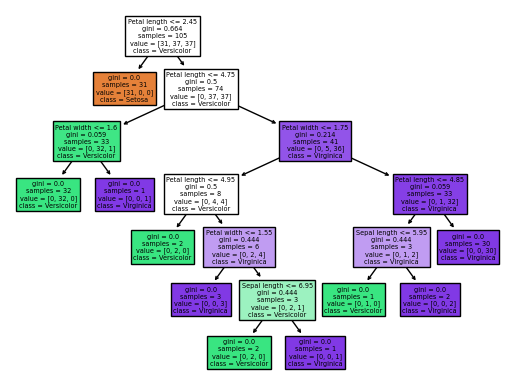

In [45]:
f_n = ["Sepal length","Sepal width","Petal length","Petal width"]
c_n = ["Setosa","Versicolor","Virginica"]
plot_tree(model,feature_names=f_n,class_names=c_n,filled =True)

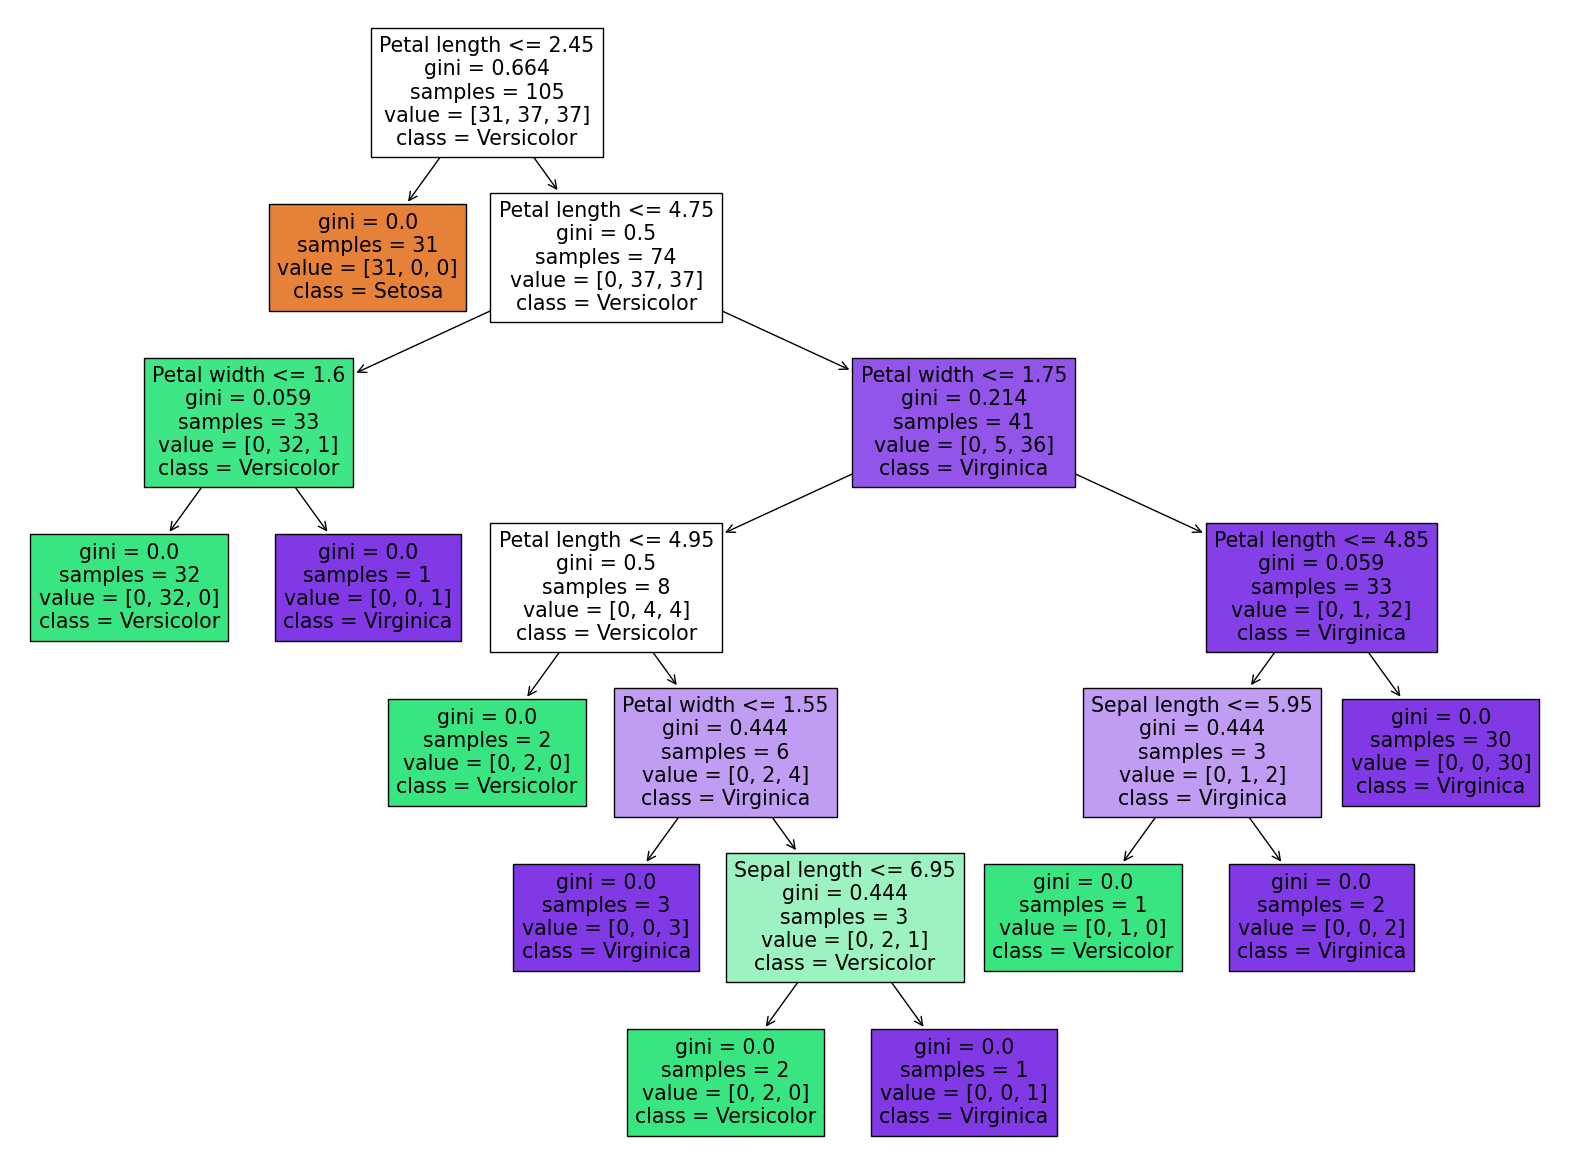

In [55]:
plt.figure(figsize = (20,15))
tree = tree.plot_tree(model, feature_names = f_n, class_names = c_n, filled = True)